# Santander Challenge - Transactions value prediction

#### Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer

In [2]:
# centralize all imports and setup here
import pandas as pd
import pandas_profiling as pp
import numpy as np
import gc
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",101)

from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

## Load dataset

In [3]:
train_dataset = pd.read_csv('/Users/fabiola/Desktop/Zup/zup-ai-lab/Santander_Kaggle_Challenge/all/train.csv')
test_dataset = pd.read_csv('/Users/fabiola/Desktop/Zup/zup-ai-lab/Santander_Kaggle_Challenge/all/test.csv')

In [4]:
train_dataset.tail()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,...,31e434a58,e431708ff,fb42abc0d,88263a031,ab7764ead,a380d5301,46ee7f2c8,2e1287e41,23310aa6f,9dc52515a,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
4454,ff85154c8,1065000.0,0.0,0,0.0,0,0,0,0,0,70000.0,0.0,0.0,0,0,6000000,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,6000000,0,0.0,0,0,0.0,0,0,0.0,0,0,920000.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,ffb6b3f4f,48000.0,0.0,0,0.0,0,0,0,0,0,375000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,375000.0,0,0.0,0,0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,375000.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,80000.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,375000.0,0,0,0.0,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,ffcf61eb6,2800000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,319612000.0,0,0,0,30000.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,4291000.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,ffea67e98,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,200000.0,1500000.0,0,0.0,0,0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,1500000.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4458,ffeb15d25,20000000.0,0.0,0,0.0,0,0,0,0,0,20000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,17800000.0,0,0,0.0,0.0,0.0,0,0,...,0.0,10000000.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [5]:
#pp.ProfileReport(train_dataset).to_file("train_dataset.html")

In [6]:
test_dataset.tail()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,...,31e434a58,e431708ff,fb42abc0d,88263a031,ab7764ead,a380d5301,46ee7f2c8,2e1287e41,23310aa6f,9dc52515a,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
49337,fff73b677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49338,fff7b5923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49339,fff7c698f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131283.569904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.960971e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.262601e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49340,fff8dba89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49341,fffbe2f6f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


## Pre-processing & Feature Engineering

#### Remove NA columns (all instances with missing values)

In [8]:
def computeNACols(dataset):
    null_columns_series = (dataset.isnull().sum() != 0)
    null_columns_list = train_dataset.columns[null_columns_series]
    return null_columns_list

#### Remove constant columns

In [9]:
def computeConstantColsToRemove(dataset):
    constantColsToRemove = []
    for col in dataset.columns:
        if col != 'ID' and col != 'target':
            if dataset[col].std() == 0:
                constantColsToRemove.append(col)
    return constantColsToRemove

#### Remove duplicated columns

In [ ]:
def computeDuplicatedColumns(dataframe):
    groups = dataframe.columns.to_series().groupby(dataframe.dtypes).groups
    dups = []

    for t, v in groups.items():
        cs = dataframe[v].columns
        vs = dataframe[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

#### Pre-processing pipeline

In [10]:

## NA columns
null_columns_list = computeNACols(train_dataset)
print("# features with NA values (NaN or None):", null_columns_list.size)
train_dataset.drop(null_columns_list, axis=1, inplace=True)
test_dataset.drop(null_columns_list, axis=1, inplace=True)

## Constant columns
constant_columns_list = computeConstantColsToRemove(train_dataset)
print("# features with constant values:", len(constant_columns_list))
train_dataset.drop(constant_columns_list, axis=1, inplace=True)
test_dataset.drop(constant_columns_list, axis=1, inplace=True)

## Duplicated columns
duplicated_columns_list = ['34ceb0081', '8d57e2749', '168b3e5bc', 'a765da8bc', 'acc5b709d']
#duplicated_columns_list = computeDuplicatedColumns(train_dataset)
print("# features with duplicated values:", len(duplicated_columns_list))
train_dataset.drop(duplicated_columns_list, axis=1, inplace=True)
test_dataset.drop(duplicated_columns_list, axis=1, inplace=True)


# features with NA values (NaN or None): 0
# features with constant values: 256
# features with duplicated values: 5


In [11]:
gc.collect()
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4732 entries, ID to 9fc776466
dtypes: float64(1845), int64(2886), object(1)
memory usage: 161.0+ MB


In [12]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4731 entries, ID to 9fc776466
dtypes: float64(4730), object(1)
memory usage: 1.7+ GB


## Building the Model

In [13]:
X_train = train_dataset.drop(['ID', 'target'], axis=1)
y_train = train_dataset['target']
X_test = test_dataset.drop(['ID'], axis=1)

In [14]:
def generate_solution(model, model_name):
    predictions_test = model.predict(X_test)
    ids_list = test_dataset['ID'].values
    solution = pd.DataFrame()
    solution['ID'] = ids_list
    predictions_final = [x if x > 0 else 0 for x in predictions_test] # handle negative predictions
    solution['target'] = predictions_final
    solution.to_csv(model_name + '-submission.csv', index=False)
    return predictions_test

#### Decision Tree Regressor

In [15]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [16]:
predictions = generate_solution(tree_model, 'decisionTreeRegressor')

#### MLP

In [17]:
from sklearn import neural_network
mlp_model = neural_network.MLPRegressor()
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
predictions = generate_solution(mlp_model, 'mlpRegressor')

#### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
predictions = generate_solution(linear_model, 'linearRegression')

## Evaluating Models

#### Visual comparing models over the own training set

Text(0.5,1,'Decision Tree Regressor (over trained set)')

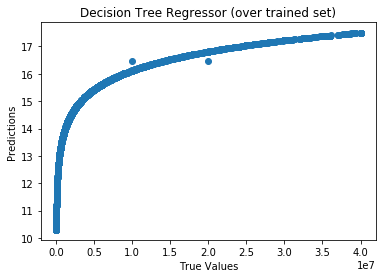

In [44]:
## The line / model
from matplotlib import pyplot as plt
%matplotlib inline
predictions = tree_model.predict(X_train)
plt.scatter(y_train, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regressor (over trained set)')

Text(0.5,1,'MLP Regressor (over trained set)')

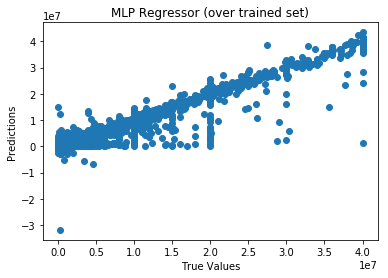

In [45]:
predictions = mlp_model.predict(X_train)
plt.scatter(y_train, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('MLP Regressor (over trained set)')

Text(0.5,1,'Linear Regressor (over trained set)')

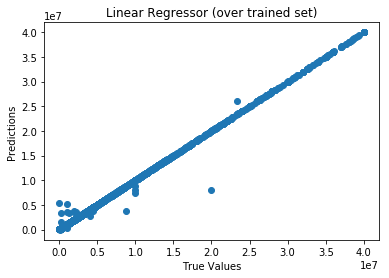

In [46]:
predictions = linear_model.predict(X_train)
plt.scatter(y_train, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regressor (over trained set)')

#### But wait... evaluate over the same trained data?

## Building models considering evaluation techniques

#### Train test split

In [50]:
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [56]:
tree_model.fit(X_train_sp, y_train_sp)
tree_model.score(X_test_sp, y_test_sp)

-0.6996523517556781

Text(0.5,1,'Decision Tree Regressor (over 20%)')

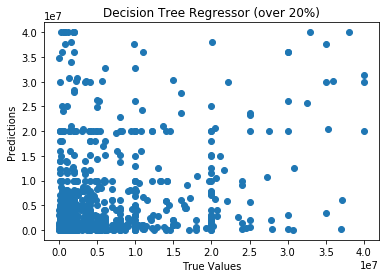

In [58]:
predictions = tree_model.predict(X_test_sp)
plt.scatter(y_test_sp, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regressor (over 20%)')

#### Cross-validation

In [67]:
from sklearn.model_selection import cross_val_score
tree_model = tree.DecisionTreeRegressor()
results = cross_val_score(tree_model, X_train, y_train, cv=10)

{'boxes': [<matplotlib.lines.Line2D at 0x1172fc588>],
 'caps': [<matplotlib.lines.Line2D at 0x1172fcf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1172f3c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1172f3828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1172fc6d8>,
  <matplotlib.lines.Line2D at 0x1172fcb70>]}

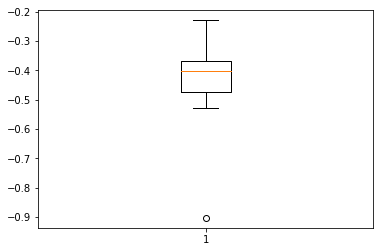

In [68]:
from matplotlib.pyplot import boxplot
boxplot(results)

In [69]:
from sklearn.model_selection import cross_val_predict
tree_model = tree.DecisionTreeRegressor()
predictions = cross_val_predict(tree_model, X_train, y_train, cv=10)

Text(0.5,1,'Decision Tree Regressor (cv=10)')

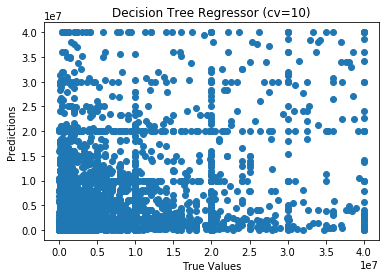

In [70]:
plt.scatter(y_train, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regressor (cv=10)')

In [ ]:
!!! fazer cross-val para Linear Regression !!


## Drafts - Ignore them

#### CatBoost Model

In [ ]:
## Try this one
#y_train = np.log1p(train_dataset['target'])
#predictions_test = np.expm1(model.predict(X_test))

In [ ]:
dev_X, val_X, dev_y, val_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [90]:
cb_model = CatBoostRegressor(iterations=600,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 10,
                             od_wait=20)
                             #custom_metric=['F1'])

In [91]:
cb_model.fit(dev_X, dev_y,
             eval_set=(val_X, val_y),
             use_best_model=True,
             verbose=10)

0:	learn: 13.8898166	test: 13.8769940	best: 13.8769940 (0)	total: 13.9s	remaining: 2h 18m 48s
10:	learn: 8.4864703	test: 8.4659716	best: 8.4659716 (10)	total: 2m 34s	remaining: 2h 17m 40s
20:	learn: 5.2987164	test: 5.2777103	best: 5.2777103 (20)	total: 4m 32s	remaining: 2h 5m 15s
30:	learn: 3.4849957	test: 3.4613802	best: 3.4613802 (30)	total: 6m 44s	remaining: 2h 3m 49s
40:	learn: 2.5121716	test: 2.4862805	best: 2.4862805 (40)	total: 8m 48s	remaining: 2h 3s
50:	learn: 2.0300806	test: 2.0029626	best: 2.0029626 (50)	total: 10m 50s	remaining: 1h 56m 47s
60:	learn: 1.8104713	test: 1.7845538	best: 1.7845538 (60)	total: 12m 46s	remaining: 1h 52m 50s
70:	learn: 1.7067152	test: 1.6832679	best: 1.6832679 (70)	total: 14m 49s	remaining: 1h 50m 24s
80:	learn: 1.6562604	test: 1.6347952	best: 1.6347952 (80)	total: 17m 8s	remaining: 1h 49m 52s
90:	learn: 1.6242247	test: 1.6074910	best: 1.6074910 (90)	total: 19m 8s	remaining: 1h 47m 2s
100:	learn: 1.6047994	test: 1.5947964	best: 1.5947964 (100)	total

## Running model on test set

In [92]:
test_dataset = pd.read_csv('/Users/fabiola/Desktop/Zup/zup-ai-lab/Santander_Kaggle_Challenge/all/test.csv')

In [93]:
test_dataset.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,...,31e434a58,e431708ff,fb42abc0d,88263a031,ab7764ead,a380d5301,46ee7f2c8,2e1287e41,23310aa6f,9dc52515a,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.528249e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3360000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,20884000.0,0.0,0.0,0.0,0.0,0.0,36252000.0,0.0,20000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25010000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# remove constant cols
test_dataset.drop(constantColsToRemove, axis=1, inplace=True)

# remove duplicated cols
colsToRemove = ['34ceb0081', '8d57e2749', '168b3e5bc', 'a765da8bc', 'acc5b709d']
test_dataset.drop(colsToRemove, axis=1, inplace=True)

In [101]:
X_test = test_dataset.drop(['ID'], axis=1)

In [102]:
pred_test_cat = np.expm1(cb_model.predict(X_test))

In [103]:
pred_test_cat

array([1328408.14237473, 1626833.29322518, 1310208.91404622, ...,
        412505.1496699 , 1187935.90476422, 1604207.75064172])

In [105]:
ids_list = test_dataset['ID'].values
solution = pd.DataFrame()
solution['ID'] = ids_list
solution['target'] = pred_test_cat
solution.tail()

,ID,target
49337,fff73b677,4.704455e+05
49338,fff7b5923,5.668339e+06
49339,fff7c698f,4.125051e+05
49340,fff8dba89,1.187936e+06
49341,fffbe2f6f,1.604208e+06


In [108]:
solution.to_csv('catboost-submission.csv', index=False)